In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import os
import sys

In [2]:

# Get the current notebook's directory
current_directory = os.getcwd()

# Get the parent directory
parent_directory = os.path.dirname(os.path.dirname(current_directory))

# Add the parent directory to the module search path
sys.path.insert(0, parent_directory)
print(parent_directory)

/n/holylabs/LABS/mzitnik_lab/Users/afang/GET


In [3]:
from data.pdb_utils import VOCAB

In [17]:
def get_distances(indexes, embeddings, distance_metric="euclidean", num_pairs=500):
    pairs = [random.sample(indexes, 2) for _ in range(num_pairs)]
    distances = []
    for pair in pairs:
        emb1 = embeddings[pair[0]]
        emb2 = embeddings[pair[1]]
        if distance_metric == "euclidean":
            dist = np.linalg.norm(emb1 - emb2)
        elif distance_metric == "cosine":
            dist = np.dot(emb1, emb2)/(np.linalg.norm(emb1)*np.linalg.norm(emb2))
        else:
            raise ValueError("Invalid distance metric")
        distances.append(dist)
    distances = np.array(distances)
    return distances

In [24]:
def get_between_distances(indexes1, indexes2, embeddings1, embeddings2, distance_metric="euclidean", num_pairs=500):
    pairs = [(random.choice(indexes1), random.choice(indexes2)) for _ in range(num_pairs)]
    distances = []
    for pair in pairs:
        emb1 = embeddings1[pair[0]]
        emb2 = embeddings2[pair[1]]
        if distance_metric == "euclidean":
            dist = np.linalg.norm(emb1 - emb2)
        elif distance_metric == "cosine":
            dist = np.dot(emb1, emb2)/(np.linalg.norm(emb1)*np.linalg.norm(emb2))
        else:
            raise ValueError("Invalid distance metric")
        distances.append(dist)
    distances = np.array(distances)
    return distances

# Residue embeddings

In [5]:
embedding_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_embeddings_all"
embeddings = {}
for embedding_file in os.listdir(embedding_dir):
    if "valid" not in embedding_file:
        continue
    embeddings[embedding_file] = np.load(os.path.join(embedding_dir, embedding_file, "graph_embeddings.npy"))

In [15]:
all_embeddings = np.concatenate(list(embeddings.values()), axis=0)
all_embeddings.shape

(33074, 40)

In [32]:
num_pairs = 1000
distances_PP_all = get_between_distances(range(embeddings["QBioLiP_PP_valid"].shape[0]), range(all_embeddings.shape[0]), embeddings["QBioLiP_PP_valid"], all_embeddings, distance_metric="cosine", num_pairs=num_pairs)
distances_Ppeptide_all = get_between_distances(range(embeddings["QBioLiP_Ppeptide_valid"].shape[0]), range(all_embeddings.shape[0]), embeddings["QBioLiP_Ppeptide_valid"], all_embeddings, distance_metric="cosine", num_pairs=num_pairs)
distances_Ppeptide = get_distances(range(embeddings["QBioLiP_Ppeptide_valid"].shape[0]), embeddings["QBioLiP_Ppeptide_valid"], distance_metric="cosine", num_pairs=num_pairs)
distances_PP = get_distances(range(embeddings["QBioLiP_PP_valid"].shape[0]), embeddings["QBioLiP_PP_valid"], distance_metric="cosine", num_pairs=num_pairs)
distances_PP_Ppeptide = get_between_distances(range(embeddings["QBioLiP_PP_valid"].shape[0]), range(embeddings["QBioLiP_Ppeptide_valid"].shape[0]), embeddings["QBioLiP_PP_valid"], embeddings["QBioLiP_Ppeptide_valid"], distance_metric="cosine", num_pairs=num_pairs)

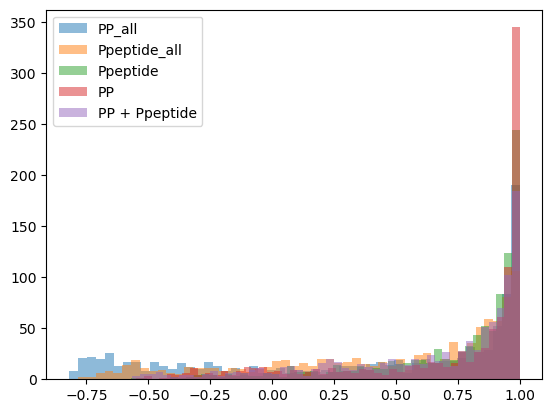

In [34]:
plt.hist(distances_PP_all, bins=50, alpha=0.5, label="PP_all")
plt.hist(distances_Ppeptide_all, bins=50, alpha=0.5, label="Ppeptide_all")
plt.hist(distances_Ppeptide, bins=50, alpha=0.5, label="Ppeptide")
plt.hist(distances_PP, bins=50, alpha=0.5, label="PP")
plt.hist(distances_PP_Ppeptide, bins=50, alpha=0.5, label="PP + Ppeptide")
plt.legend()
plt.show()

In [36]:
from scipy.stats import ks_2samp
print("All vs Ppeptide", ks_2samp(distances_Ppeptide_all, distances_Ppeptide))
print("All vs PP", ks_2samp(distances_PP_all , distances_PP))
print("All_Ppeptide vs PP + Ppeptide", ks_2samp(distances_Ppeptide_all, distances_PP_Ppeptide))
print("Ppeptide vs PP", ks_2samp(distances_Ppeptide, distances_PP))
print("Ppeptide vs PP + Ppeptide", ks_2samp(distances_Ppeptide, distances_PP_Ppeptide))
print("PP vs PP + Ppeptide", ks_2samp(distances_PP, distances_PP_Ppeptide))


All vs Ppeptide KstestResult(statistic=0.245, pvalue=9.520860663442335e-27, statistic_location=0.5217217, statistic_sign=1)
All vs PP KstestResult(statistic=0.24, pvalue=1.1289850689115942e-25, statistic_location=0.6500866, statistic_sign=1)
All_Ppeptide vs PP + Ppeptide KstestResult(statistic=0.149, pvalue=4.2475154084352807e-10, statistic_location=0.4600175, statistic_sign=1)
Ppeptide vs PP KstestResult(statistic=0.121, pvalue=8.513708327314542e-07, statistic_location=0.9766354, statistic_sign=1)
Ppeptide vs PP + Ppeptide KstestResult(statistic=0.113, pvalue=5.577646320340156e-06, statistic_location=0.51882315, statistic_sign=-1)
PP vs PP + Ppeptide KstestResult(statistic=0.178, pvalue=2.980114180184982e-14, statistic_location=0.9466694, statistic_sign=-1)


## Pretrained

In [5]:
embedding_dir = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/pretrained_embeddings/PLA30"

In [6]:
with open(f"{embedding_dir}/block_id.npy", "rb") as f:
    block_id = np.load(f)

with open(f"{embedding_dir}/block_embeddings.npy", "rb") as f:
    embeddings = np.load(f)

# Unique group IDs
unique_aa = np.unique(block_id)
unique_aa = unique_aa[(unique_aa < 37) & (unique_aa > 3)]

In [7]:
rand_dist = get_distances(range(0, len(block_id)), embeddings)
rand_dist = np.sort(rand_dist)
output = []
for aa in unique_aa:
    indexes = list((block_id == aa).nonzero()[0])
    distances = get_distances(indexes, embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((aa, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_abrv(x))
df

,aa,ks_stat,pvalue
0,GLY,0.090,3.479508e-02
1,ALA,0.114,2.990051e-03
2,VAL,0.108,5.832083e-03
3,LEU,0.166,1.975130e-06
4,ILE,0.150,2.521545e-05
5,PHE,0.116,2.373822e-03
6,TRP,0.130,4.212435e-04
7,TYR,0.130,4.212435e-04
8,ASP,0.108,5.832083e-03
9,HIS,0.160,5.293265e-06


In [8]:
aa_type = 12

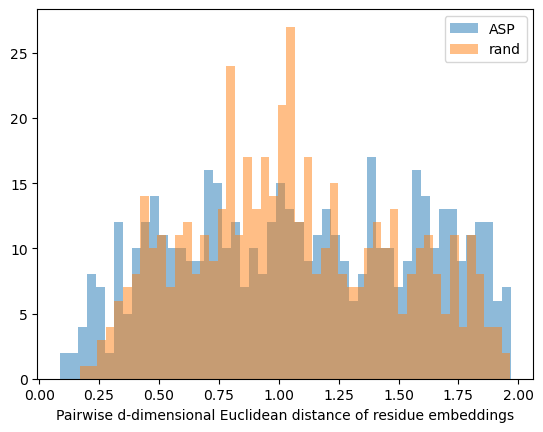

In [9]:
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), embeddings)
plt.hist(aa_dist, bins=50, alpha=0.5, label=VOCAB.idx_to_abrv(aa_type))
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


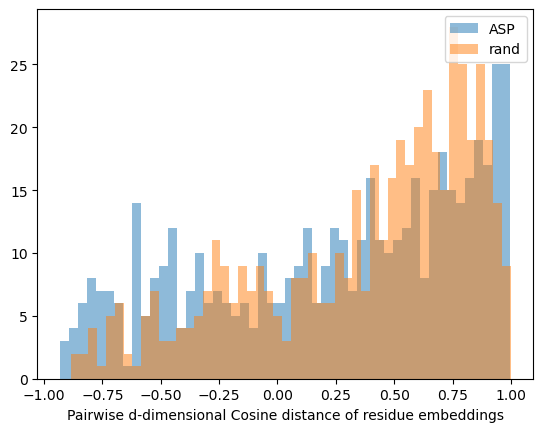

In [10]:
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), embeddings, distance_metric="cosine")
plt.hist(aa_dist, bins=50, alpha=0.5, label=VOCAB.idx_to_abrv(aa_type))
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Cosine distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


## Finetuned

In [11]:
embedding_dir1 = "/n/holylabs/LABS/mzitnik_lab/Users/afang/GET/case_studies/visualise_nodes/finetuned_embeddings/PLA30"

In [12]:
with open(f"{embedding_dir1}/block_id.npy", "rb") as f:
    block_id = np.load(f)

with open(f"{embedding_dir1}/block_embeddings.npy", "rb") as f:
    embeddings = np.load(f)

# Unique group IDs
unique_aa = np.unique(block_id)
unique_aa = unique_aa[(unique_aa < 37) & (unique_aa > 3)]

In [13]:
rand_dist = get_distances(range(0, len(block_id)), embeddings)
rand_dist = np.sort(rand_dist)
output = []
for aa in unique_aa:
    indexes = list((block_id == aa).nonzero()[0])
    distances = get_distances(indexes, embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((aa, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_abrv(x))
df

,aa,ks_stat,pvalue
0,GLY,0.094,0.024066
1,ALA,0.046,0.665922
2,VAL,0.076,0.111368
3,LEU,0.068,0.198042
4,ILE,0.060,0.329358
5,PHE,0.068,0.198042
6,TRP,0.074,0.129396
7,TYR,0.046,0.665922
8,ASP,0.084,0.058689
9,HIS,0.120,0.001478


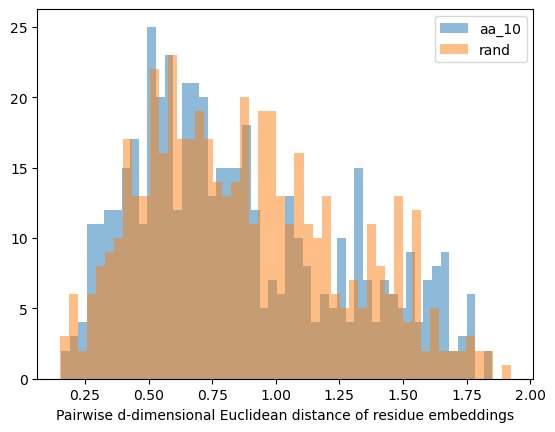

In [14]:
aa_type = 10
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), embeddings)
plt.hist(aa_dist, bins=50, alpha=0.5, label=f'aa_{aa_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()


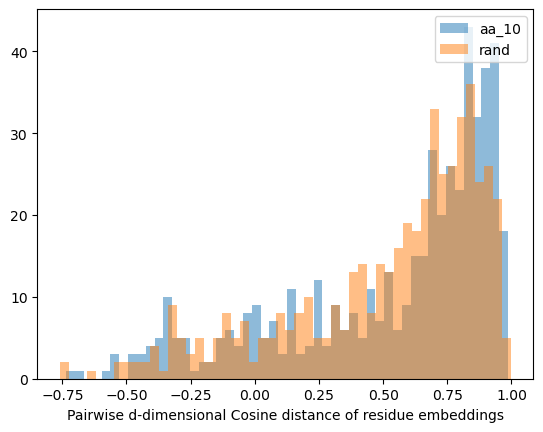

In [19]:
aa_type = 10
aa_dist = get_distances(list((block_id == aa_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), embeddings, distance_metric="cosine")
plt.hist(aa_dist, bins=50, alpha=0.5, label=f'aa_{aa_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Cosine distance of residue embeddings")
plt.legend(loc='upper right')
plt.show()

# Atom embeddings

## Pretrained

In [15]:
with open(f"{embedding_dir}/atom_id.npy", "rb") as f:
    atom_id = np.load(f)
with open(f"{embedding_dir}/atom_embeddings.npy", "rb") as f:
    atom_embeddings = np.load(f)

atom_embeddings = atom_embeddings[atom_id > 2]
atom_id = atom_id[atom_id > 2]
atom_embeddings = atom_embeddings[:, :atom_embeddings.shape[1]//2] # remove block embedding that is concatenated to atom embedding

In [16]:
rand_dist = get_distances(range(0, len(atom_id)), atom_embeddings)
rand_dist = np.sort(rand_dist)
output = []
for atom in np.unique(atom_id):
    indexes = list((atom_id == atom).nonzero()[0])
    if len(indexes) < 50:
        output.append((atom, "not enough atoms", "not enough atoms"))
        continue
    distances = get_distances(indexes, atom_embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((atom, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_atom(x))
df

,aa,ks_stat,pvalue
0,C,0.072,0.149732
1,N,0.09,0.034795
2,O,0.058,0.369905
3,F,0.664,0.0
4,Na,not enough atoms,not enough atoms
5,Mg,1.0,0.0
6,P,0.748,0.0
7,S,0.156,0.00001
8,Cl,0.782,0.0
9,K,not enough atoms,not enough atoms


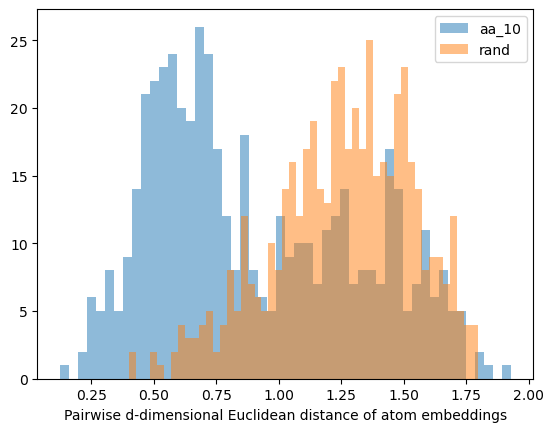

In [17]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings)
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

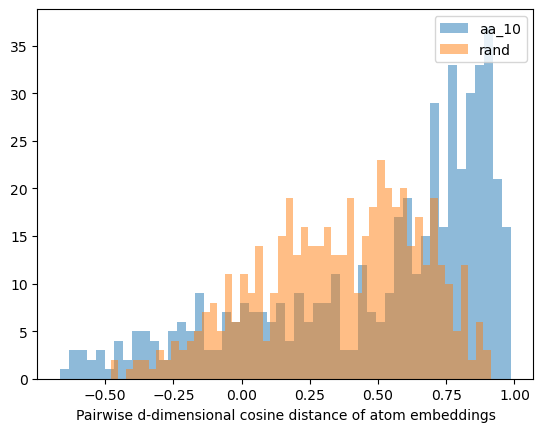

In [25]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings, distance_metric="cosine")
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional cosine distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

## Finetuned

In [18]:
with open(f"{embedding_dir1}/atom_id.npy", "rb") as f:
    atom_id = np.load(f)
with open(f"{embedding_dir1}/atom_embeddings.npy", "rb") as f:
    atom_embeddings = np.load(f)

atom_embeddings = atom_embeddings[atom_id > 2]
atom_id = atom_id[atom_id > 2]
atom_embeddings = atom_embeddings[:, :atom_embeddings.shape[1]//2] # remove block embedding that is concatenated to atom embedding

In [19]:
rand_dist = get_distances(range(0, len(atom_id)), atom_embeddings)
rand_dist = np.sort(rand_dist)
output = []
for atom in np.unique(atom_id):
    indexes = list((atom_id == atom).nonzero()[0])
    if len(indexes) < 50:
        output.append((atom, "not enough atoms", "not enough atoms"))
        continue
    distances = get_distances(indexes, atom_embeddings, distance_metric="euclidean")
    distances = np.sort(distances)
    res = scipy.stats.ks_2samp(list(distances), list(rand_dist))
    output.append((atom, res.statistic, res.pvalue))

df = pd.DataFrame(output, columns=["aa", "ks_stat", "pvalue"])
df["aa"] = df["aa"].apply(lambda x: VOCAB.idx_to_atom(x))
df

,aa,ks_stat,pvalue
0,C,0.124,0.000906
1,N,0.218,0.0
2,O,0.056,0.413486
3,F,0.378,0.0
4,Na,not enough atoms,not enough atoms
5,Mg,0.952,0.0
6,P,0.682,0.0
7,S,0.082,0.069301
8,Cl,0.478,0.0
9,K,not enough atoms,not enough atoms


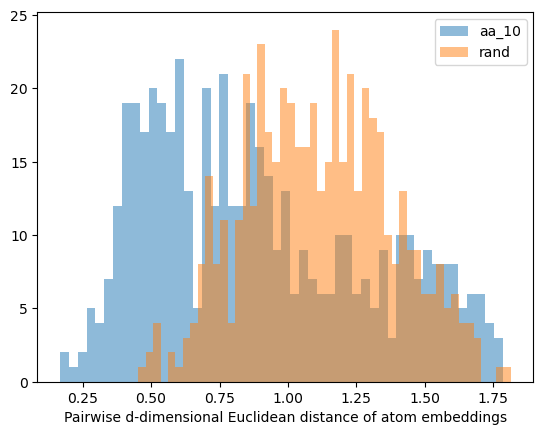

In [20]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings)
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings)
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional Euclidean distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()

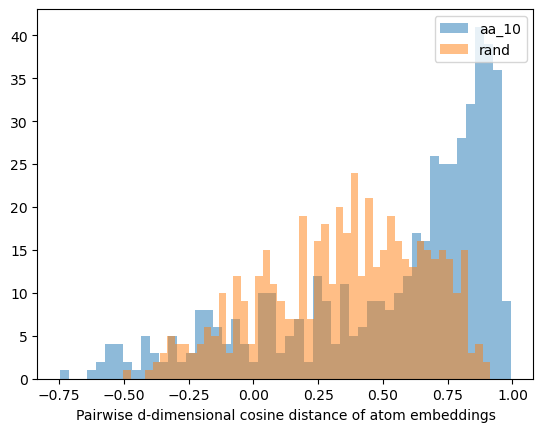

In [21]:
atom_type = 10
atom_distance = get_distances(list((block_id == atom_type).nonzero()[0]), embeddings, distance_metric="cosine")
rand_dist = get_distances(range(0, len(block_id)), atom_embeddings, distance_metric="cosine")
plt.hist(atom_distance, bins=50, alpha=0.5, label=f'aa_{atom_type}')
plt.hist(rand_dist, bins=50, alpha=0.5, label='rand')
plt.xlabel("Pairwise d-dimensional cosine distance of atom embeddings")
plt.legend(loc='upper right')
plt.show()